In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

0

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df['customerID'].duplicated().sum()

0

In [21]:
def conv(value):
    if value ==1:
        return "yes"
    else:

        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it more easier to understand

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


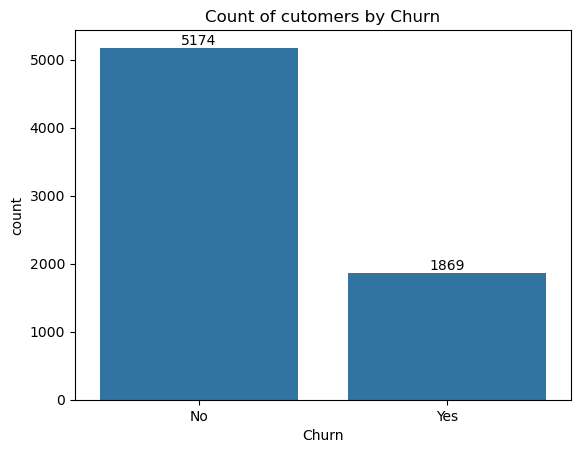

In [37]:
ax =sns.countplot(x = 'Churn', data = df)
plt.title("Count of cutomers by Churn")
ax.bar_label(ax.containers[0])
plt.show()

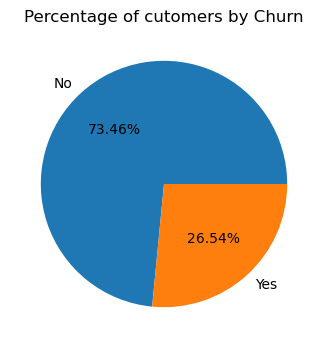

In [38]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.title("Percentage of cutomers by Churn")
plt.pie(gb['Churn'], labels = gb.index , autopct = "%1.2f%%" )
plt.show()

#From the above pie chart we can conclude that 26.54% of customers have churned out.
#Now, let's explore the reasons behind it

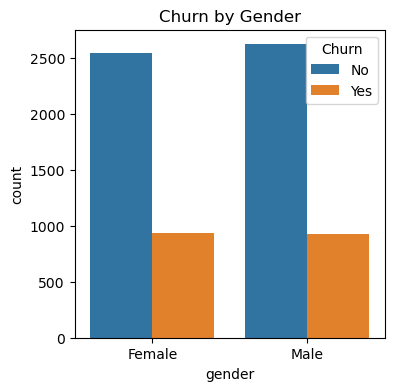

In [43]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

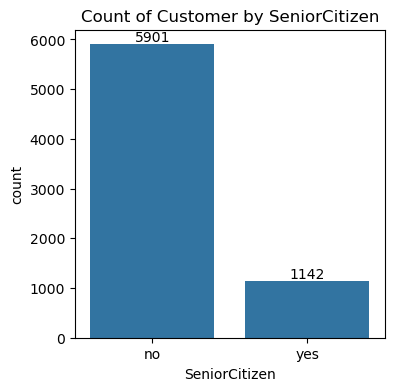

In [48]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen", data = df)
ax.bar_label(ax.containers[0]) 
plt.title("Count of Customer by SeniorCitizen")
plt.show()

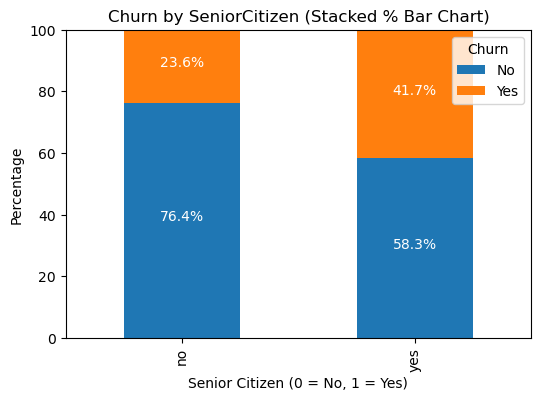

In [46]:
# Calculate percentage counts
df_grouped = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot stacked bar chart
ax = df_grouped.plot(kind="bar", stacked=True, figsize=(6, 4))

# Add labels
for i, total in enumerate(df_grouped.sum(axis=1)):  # Iterate over bars
    bottom = 0
    for churn_status, percentage in df_grouped.iloc[i].items():
        plt.text(i, bottom + percentage / 2, f"{percentage:.1f}%", ha="center", color="white", fontsize=10)
        bottom += percentage

# Formatting
plt.title("Churn by SeniorCitizen (Stacked % Bar Chart)")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc="upper right")
plt.ylim(0, 100)

plt.show()

#Comparative a greater percentage of people in senior citizen category have churned out

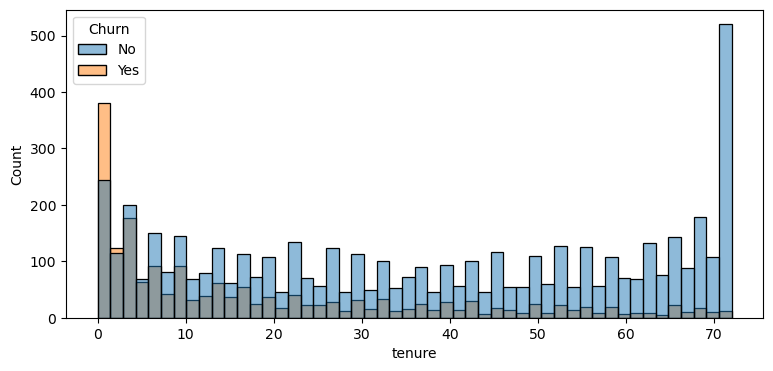

In [52]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data= df,bins=50, hue='Churn')
plt.show()

#People who have used services for long have stayed and people who have used our services for 1 or 2 months have churned out

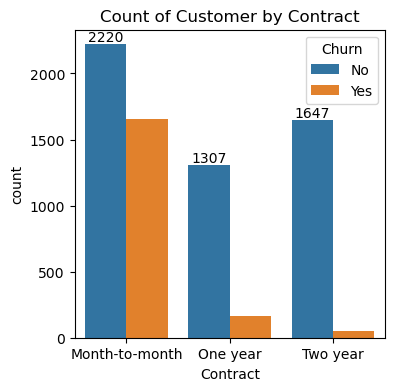

In [54]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data = df, hue="Churn")
ax.bar_label(ax.containers[0]) 
plt.title("Count of Customer by Contract")
plt.show()

#People who have a month-to-month contract are likely to churn than those who have a 1 or 2 years of contract

In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

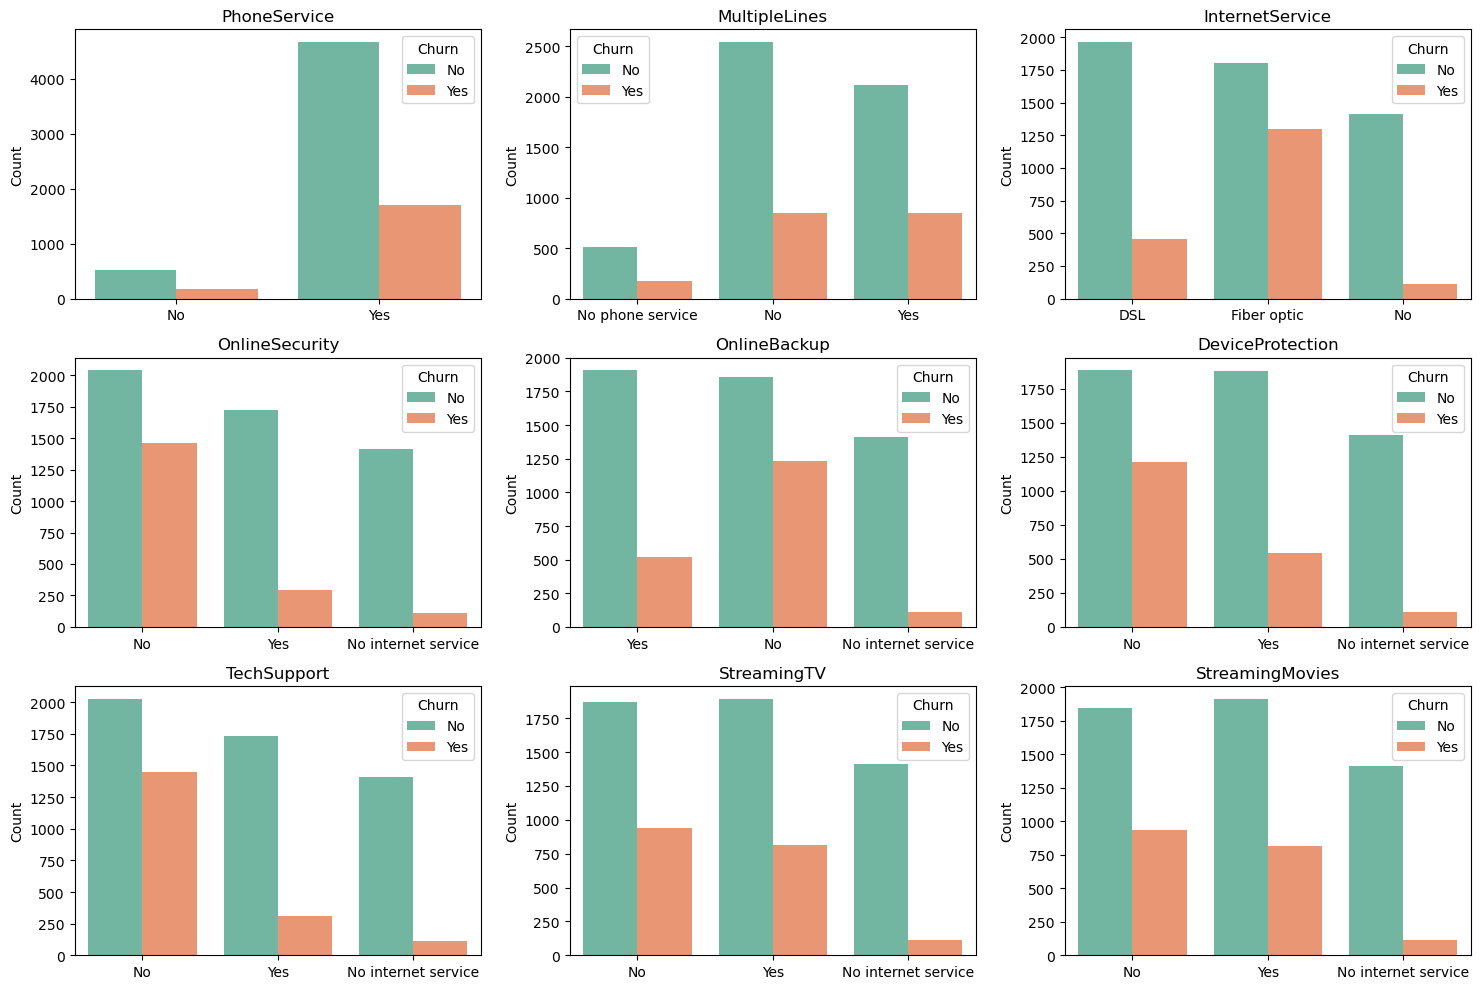

In [59]:
# List of categorical columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine grid size
num_cols = 3  # Number of columns in subplot grid
num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten for easy iteration

# Generate count plots
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="Set2", hue = df['Churn'])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


The subplots visualize the distribution of different telecom services (`PhoneService`, `MultipleLines`, `InternetService`, etc.) and their relationship with customer churn. Customers with no internet service tend to have lower churn rates, while those using fiber optic internet exhibit higher churn. Services like `OnlineSecurity`, `TechSupport`, and `DeviceProtection` show a higher churn among customers who do not have them. The analysis suggests that customers with fewer add-on services are more likely to churn.

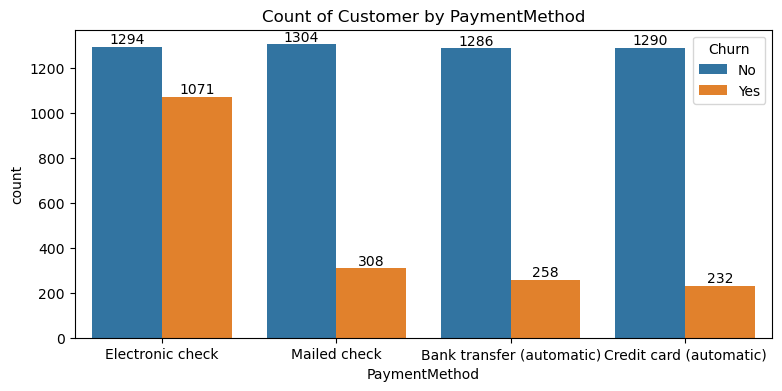

In [64]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x="PaymentMethod", data = df, hue= df['Churn'])
ax.bar_label(ax.containers[0]) 
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by PaymentMethod")
plt.show()

#Customer is likely to churn when he is using Electronic check as his payment method